# Machine Learning - Tarea 1
---

<div style="text-align: right">
Vicente Lizana - 201310004-K
</div>
<div style="text-align: right">
Álvaro Valderrama - 201390005-4
</div>

---

In [102]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold, train_test_split
from sklearn import cross_validation

/home/vlizana/u/machine-learning/env/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 1.- LSS
---
### 1.a

#### Construcción del Dataframe

In [2]:
df = pd.read_csv("kc_house_data.csv", sep=',', header=0)
df = df.drop(["id", "date", "zipcode"], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,47.3684,-122.031,2390,7570


---
### 1.b

#### Descripción de la data

In [3]:
df.shape

(21613, 18)

Tenemos 21613 datos, con 18 atributos cada uno. Tipos de datos:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


---
Información estadística de los atributos.

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


---
### 1.c

Como podemos ver, los datos tienen diferentes ordenes de magnitud, por lo que resulta deseable normalizar para poder comparar mas facilmente.

In [17]:
X = df
y = np.log(df['price'])
mask = np.zeros(len(X))
limit = int(len(X)*0.7)
mask[:limit] = 1
istrain = (mask== 1)
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
Xtrain = Xtrain.drop(['price'], axis=1)
Xtest = Xtest.drop(['price'], axis=1)

scaler = StandardScaler().fit(Xtrain)
df_scaled_train = pd.DataFrame(scaler.transform(Xtrain), columns=Xtrain.columns)
df_scaled_train.insert(df_scaled_train.shape[1], 'intercept', np.ones(df_scaled_train.shape[0]))
df_scaled_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,intercept
count,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,15129.0
mean,1.286858e-16,-1.615617e-16,7.890223e-17,1.831659e-17,-8.242465e-17,-1.878624e-18,-4.720044e-17,-1.817569e-16,2.799150e-16,-3.663318e-17,-4.109491e-17,5.161521e-16,1.127175e-17,-1.267743e-14,2.542342e-14,-1.225802e-16,2.817937e-17,1.0
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,0.0
min,-3.695522e+00,-2.714893e+00,-1.844550e+00,-3.578749e-01,-8.478007e-01,-8.674852e-02,-3.101098e-01,-3.675091e+00,-3.940270e+00,-1.695150e+00,-6.746338e-01,-2.400159e+00,-2.174314e-01,-2.890957e+00,-2.184469e+00,-2.338019e+00,-4.573661e-01,1.0
25%,-3.963096e-01,-7.372207e-01,-7.074380e-01,-2.446882e-01,-8.478007e-01,-8.674852e-02,-3.101098e-01,-6.733930e-01,-5.071207e-01,-7.031746e-01,-6.746338e-01,-6.147711e-01,-2.174314e-01,-6.799023e-01,-8.048581e-01,-7.175202e-01,-2.870689e-01,1.0
50%,-3.963096e-01,-7.799663e-02,-1.775219e-01,-1.868669e-01,-8.478007e-01,-8.674852e-02,-3.101098e-01,-6.733930e-01,-5.071207e-01,-2.691856e-01,-6.746338e-01,6.367636e-02,-2.174314e-01,9.432470e-02,-1.150526e-01,-2.125067e-01,-2.007706e-01,1.0
75%,7.034278e-01,5.812274e-01,4.959132e-01,-1.122745e-01,1.113119e+00,-8.674852e-02,-3.101098e-01,8.274559e-01,3.511665e-01,4.747956e-01,6.581544e-01,8.135394e-01,-2.174314e-01,8.506629e-01,6.322367e-01,5.301602e-01,-1.110232e-01,1.0
max,8.401590e+00,7.832692e+00,1.268398e+01,3.825488e+01,4.054499e+00,1.152757e+01,4.846968e+00,2.328305e+00,4.642603e+00,9.501768e+00,1.003210e+01,1.706233e+00,4.645406e+00,1.557628e+00,6.466842e+00,6.144722e+00,3.081912e+01,1.0


---
### 1.d

Importancia de:
```python
X.insert(X.shape[1], "intercept", np.ones(N))
```
Necesitamos agregar esta columna con puros numeros 1 para permitir que el hiperplano definido por $\hat{\beta}$ no pase por el origen (supuesto fuerte), lo que permite que la solución se ajuste mejor a la data.

Parámetros de las funciones de regresión:
```python
linreg = lm.LinearRegression(fit_intercept=False)
linreg.fit(Xtrain, ytrain)
```
Ponemos `fit_intercept=False` ya que normalizamos previamente la data.  
`Xtrain` es nuestro _train set_, con un 70% de los datos para poder hacer _validation_.  
`ytrain` es el 70% del _target_. Sobre ellos se realizará LS.

In [24]:
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(df_scaled_train, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

Podemos ver los coeficientes

In [25]:
coefs = linreg.predict(np.eye(18))
coefs # \beta

array([ -1.04765468e-02,   5.58057265e-02,   2.08498115e+12,
         2.31137384e-02,   3.60224125e-02,   3.36924247e-02,
         4.24007183e-02,   4.73007727e-02,   1.84020317e-01,
        -1.85633904e+12,  -1.03623473e+12,  -1.04992241e-01,
         1.50578906e-02,   1.87753578e-01,  -4.08909745e-03,
         8.44178266e-02,  -7.24660961e-03,   1.30333131e+01])

In [9]:
delta_y = ytrain - linreg.predict(df_scaled_train) # y - \hat{y}
sigma2 = delta_y.dot(delta_y) / (Xtrain.shape[0]-coefs.shape[0]-1)
sigma = np.sqrt(sigma2)
sigma # \hat{sigma}

0.25416937838827902

In [36]:
X_U, X_Sigma, X_VT = sp.linalg.svd(df_scaled_train, full_matrices=False)
X_Sigma_inv = 1/X_Sigma
mat_v = X_VT.T @ np.diag(X_Sigma_inv**2) @ X_VT
v = np.diag(mat_v)
v

array([  2.15228115e-04,   2.25023523e-04,   8.00619830e+25,
         1.47701354e-04,   1.34174573e-04,   7.88323044e-05,
         9.64146363e-05,   8.80462803e-05,   2.34502126e-04,
         6.34653495e+25,   1.97759960e+25,   1.49180854e-04,
         7.67920920e-05,   7.43109905e-05,   1.00146454e-04,
         1.98788337e-04,   1.45116251e-04,   6.69019753e-05])

In [47]:
z_scores = coefs / (sigma * np.sqrt(v))
for i in range(len(z_scores)):
    print(df_scaled_train.columns.values[i], ": ", z_scores[i])

bedrooms :  -2.8096060452
bathrooms :  14.6366463497
sqft_living :  0.916781273959
sqft_lot :  7.48263790729
floors :  12.2352953873
waterfront :  14.9299010337
view :  16.9894180663
condition :  19.8330497997
grade :  47.2790950938
sqft_above :  -0.916781273959
sqft_basement :  -0.916781273959
yr_built :  -33.8202983219
yr_renovated :  6.76055985224
lat :  85.6916430744
long :  -1.60763127487
sqft_living15 :  23.5567563406
sqft_lot15 :  -2.36675669017
intercept :  6269.20009098


---
### 1.f

In [53]:
x_test = pd.DataFrame(scaler.transform(Xtest),columns=Xtest.columns)
x_test.insert(x_test.shape[1], 'intercept', np.ones(x_test.shape[0]))
yhat_test = linreg.predict(x_test)
mse_test = np.mean(np.power(yhat_test - ytest, 2))

Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
kf = KFold(n_splits=10)
mse_cv10 = 0

for train, val in kf.split(Xm):
    cross_scaler = StandardScaler().fit(Xm[train])
    df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]), columns=Xtrain.columns)
    df_cross_train.insert(df_cross_train.shape[1], 'intercept', np.ones(df_cross_train.shape[0]))
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(df_cross_train, ym[train])
    df_cross_test = pd.DataFrame(cross_scaler.transform(Xm[val]),columns=Xtrain.columns)
    df_cross_test.insert(df_cross_test.shape[1], 'intercept', np.ones(df_cross_test.shape[0]))
    yhat_val = linreg.predict(df_cross_test)
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv10 += mse_fold

mse_cv10 = mse_cv10 / 10

kf = KFold(n_splits=5)
mse_cv5 = 0

for train, val in kf.split(Xm):
    cross_scaler = StandardScaler().fit(Xm[train])
    df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]), columns=Xtrain.columns)
    df_cross_train.insert(df_cross_train.shape[1], 'intercept', np.ones(df_cross_train.shape[0]))
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(df_cross_train, ym[train])
    df_cross_test = pd.DataFrame(cross_scaler.transform(Xm[val]),columns=Xtrain.columns)
    df_cross_test.insert(df_cross_test.shape[1], 'intercept', np.ones(df_cross_test.shape[0]))
    yhat_val = linreg.predict(df_cross_test)
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv5 += mse_fold
    
mse_cv5 = mse_cv5 / 5

In [54]:
print("MSE - test    :", mse_test)
print("MSE - 5-fold  :", mse_cv5)
print("MSE - 10-fold :", mse_cv10)

MSE - test    : 0.0651691603876
MSE - 5-fold  : 0.0646896867901
MSE - 10-fold : 0.0646879195203


Los errores resultan similares en los tres casos, lo cual es razonable tomando en cuenta la cantidad de datos. Esto también permite asumir con cierta certeza que este error no esta sujeto al _train set_ (no existe _under_ u _overfitting_).

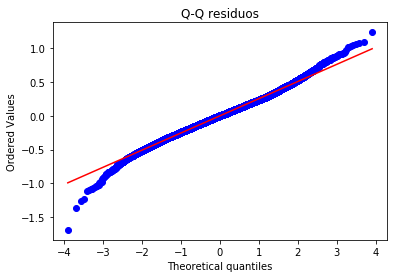

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = sp.stats.probplot(delta_y, dist=sp.stats.norm, plot=ax)
ax.set_title("Q-Q residuos")
plt.show()

Podemos ver en el gráfico Q-Q que tenemos una amplia sección lineal, lo que nos permite concluir que la hipótesis de normalidad sobre los residuos es razonable con este modelo.

---
### 1.h

In [63]:
df_A = df.sample(3000)
frames = []
valor = np.log(df.price)
for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,0.5):
    frames.append(df[(np.log(df.price) >= z) & (np.log(df.price) < z+0.5)].head(500))
df_B = pd.concat(frames).sample(3000)
X_A = df_A.iloc[:,1:].values
y_A = df_A.price
X_B = df_B.iloc[:,1:].values
y_B = df_B.price

Xtrain_A, Xval_A, ytrain_A, yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B, Xval_B, ytrain_B, yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)

In [64]:
linregA = lm.LinearRegression(fit_intercept=False)
linregA.fit(Xtrain_A, ytrain_A)

linregB = lm.LinearRegression(fit_intercept=False)
linregB.fit(Xtrain_B, ytrain_B)

deltay_A = yval_A - linregA.predict(Xval_A)
deltay_B = yval_B - linregB.predict(Xval_B)

err_A = np.mean(np.power(deltay_A, 2))
err_B = np.mean(np.power(deltay_B, 2))

print("Error A:", err_A)
print("Error B:", err_B)

Error A: 37296895184.8
Error B: 130260101071.0


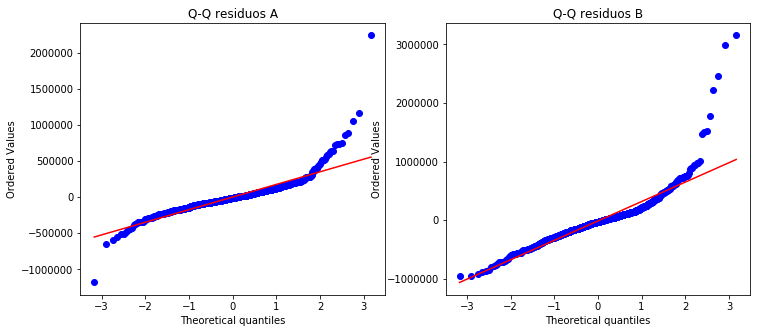

In [65]:
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121)
res1 = sp.stats.probplot(deltay_A, dist=sp.stats.norm, plot=ax1)
ax1.set_title("Q-Q residuos A")

ax2 = fig.add_subplot(122)
res2 = sp.stats.probplot(deltay_B, dist=sp.stats.norm, plot=ax2)
ax2.set_title("Q-Q residuos B")

plt.show()

---

---
## 2.- 

In [66]:
def fss(x, y, x_t, y_t, names_x, k = 10000, verbose=False):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = 0.0
    best_new_score = 0.0
    aux_score = 0.0
    mse_list_train = []
    mse_list_test = []
    while remaining and len(selected)<=k :
        score_candidates = []
        model = lm.LinearRegression(fit_intercept=False)
        
        for candidate in remaining:
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
            
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        aux_score = best_new_score
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        
        if verbose:
            print("selected = %s"%names_x[best_candidate])
            print("totalvars = %d,\nmse = %f"%(len(indexes),best_new_score))
            print()
        
        x_train = x[:, selected]
        x_test = x_t[:, selected]
        current_model = model.fit(x_train, y)
        predictions_train_res = y - current_model.predict(x_train)
        predictions_test_res = y_t - current_model.predict(x_test)
        mse_list_train.append(np.mean(np.power(predictions_train_res, 2)))
        mse_list_test.append(np.mean(np.power(predictions_test_res, 2)))
        
    return selected, mse_list_train, mse_list_test

names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
"condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long",
"sqft_living15","sqft_lot15","intercept"]
# las listas estan ordenadas por el numero de dimensiones del modelo
attr_indexes, train_mse, test_mse = fss(Xm, ym, Xtm, ytm, names_regressors)

fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(121)
ax1.scatter(range(2,2+len(train_mse)), train_mse, label="train")
ax1.scatter(range(2,2+len(test_mse)), test_mse, label="test")
ax1.legend()
ax1.grid()

plt.show()

NameError: name 'Xtm' is not defined

In [ ]:
def fss2(x, y, names_x, k = 10000, tol = 4):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = 0.0
    best_new_score = 0.0
    aux_score = 0.0
    delta_error = 0.0
    # delta error absoluto
    while (remaining) and (len(selected) <= k) and (delta_error / tol <= np.abs(aux_score - best_new_score)):
        score_candidates = []
        delta_error = np.abs(aux_score - best_new_score)
        
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
            
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        aux_score = best_new_score
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print("selected = %s"%names_x[best_candidate])
        print("totalvars = %d\nmse = %f"%(len(indexes),best_new_score))
        print("delta/delta = {0}".format(delta_error/(aux_score - best_new_score)))
        print()
        
    return selected

names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
"condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long",
"sqft_living15","sqft_lot15","intercept"]
fss2(Xm,ym,names_regressors)

In [ ]:
def fss3(x, y, names_x, k = 10000, tol = 0.005):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = 0.0
    best_new_score = 0.0
    aux_score = 1.0
    # error absoluto
    while (remaining) and (len(selected) <= k) and (tol <= np.abs(aux_score - best_new_score)):
        score_candidates = []
        delta_error = np.abs(aux_score - best_new_score)
        
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
            
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        aux_score = best_new_score
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print("selected = %s"%names_x[best_candidate])
        print("totalvars = %d\nmse = %f"%(len(indexes),best_new_score))
        print("delta/delta = {0}".format(aux_score - best_new_score))
        print()
        
    return selected

names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
"condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long",
"sqft_living15","sqft_lot15","intercept"]
fss3(Xm,ym,names_regressors)

---

---
## 3.- Ridge
---

### 3.a

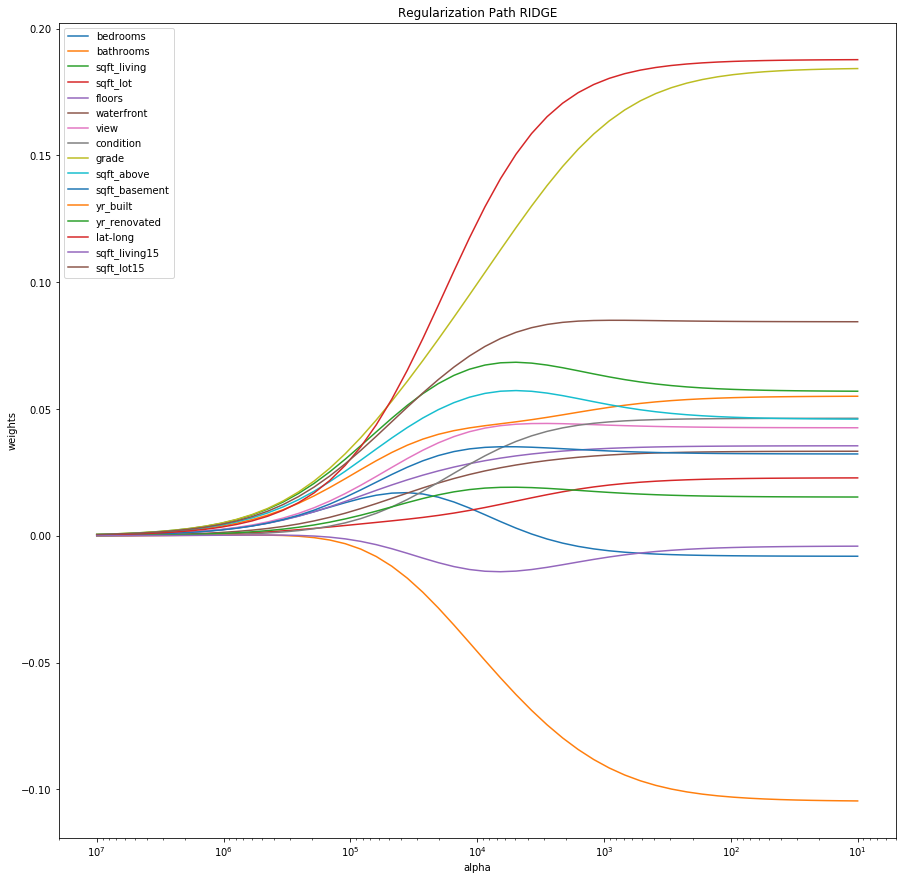

In [75]:
Dtrain = df_scaled_train.copy()
Dtrain = Dtrain.drop('intercept', axis=1)

names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
"condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long",
"sqft_living15","sqft_lot15"]

# alphas_ = np.logspace(4,-1,base=10)
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    coefs.append(model.coef_)

plt.figure(figsize=(15,15))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
#     print(alphas_.shape)
#     print(y_arr.shape)
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

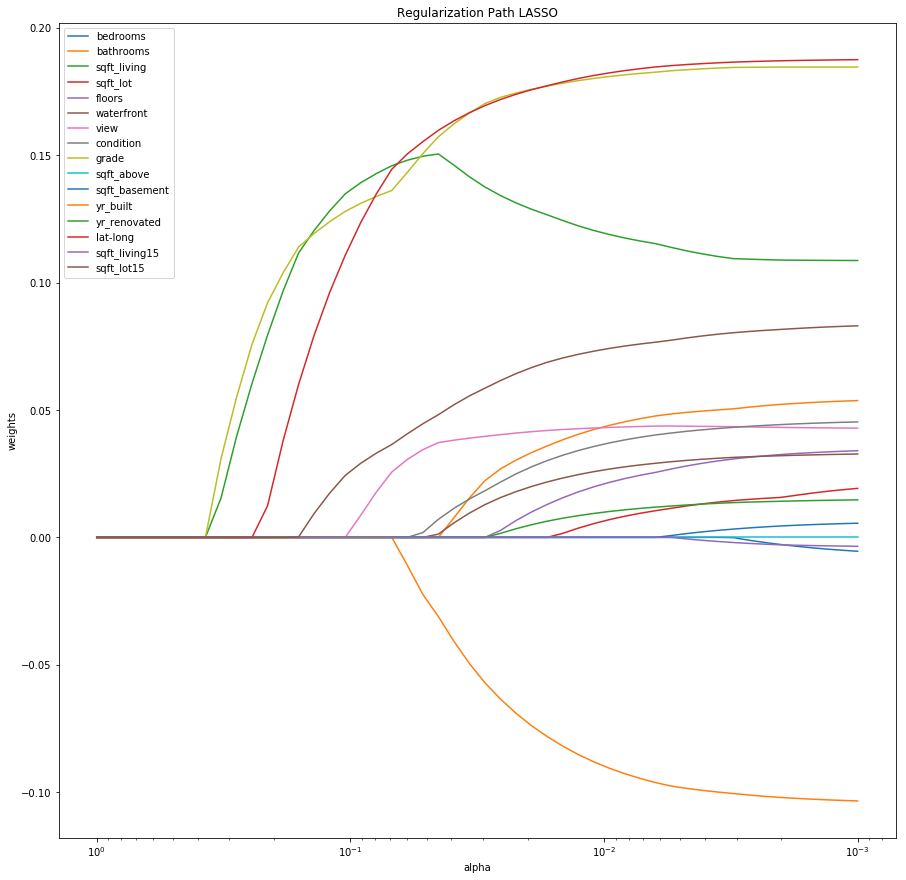

In [77]:
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    coefs.append(model.coef_)

plt.figure(figsize=(15,15))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
#     print(alphas_.shape)
#     print(y_arr.shape)
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path LASSO')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

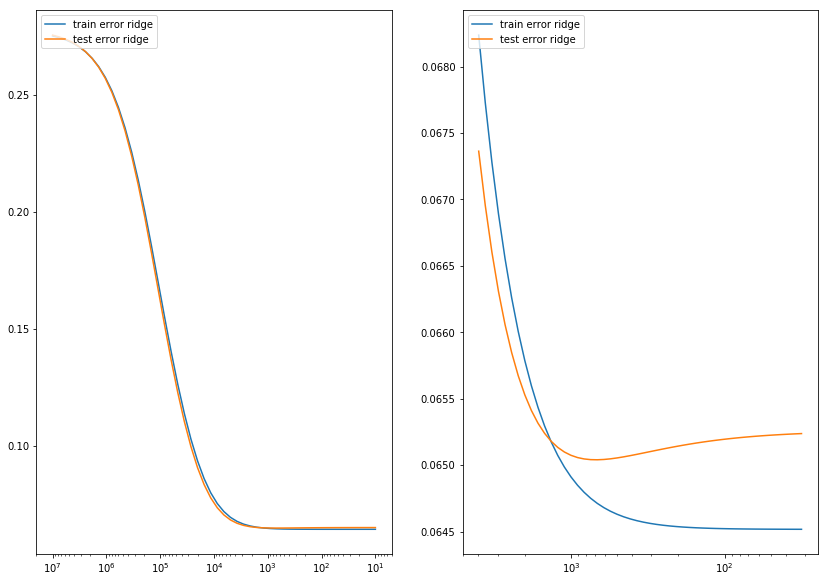

In [94]:
Xtest = x_test.copy()
ytest = ytest.copy()
Xtest = Xtest.drop('intercept', axis=1)
alphas_ = np.logspace(7,1,base=10)
coefs = []

model = Ridge(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    yhat_train = model.predict(Dtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
    
plt.figure(figsize=(14,10))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])

alphas_ = np.logspace(3.6,1.5,base=10)
coefs = []

mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    yhat_train = model.predict(Dtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])

plt.show()

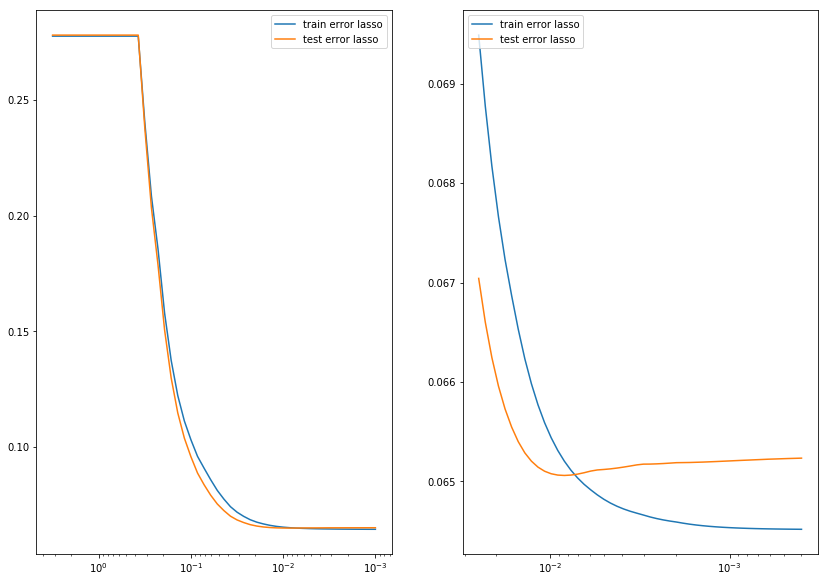

In [101]:
Xtest = x_test.copy()
ytest = ytest.copy()
Xtest = Xtest.drop('intercept', axis=1)
alphas_ = np.logspace(0.5,-3,base=10)
coefs = []

model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    yhat_train = model.predict(Dtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
    
plt.figure(figsize=(14,10))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error lasso')
ax.plot(alphas_,mse_test,label='test error lasso')
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])

alphas_ = np.logspace(-1.6,-3.4,base=10)
coefs = []

mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    yhat_train = model.predict(Dtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error lasso')
ax.plot(alphas_,mse_test,label='test error lasso')
plt.legend(loc=2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])

plt.show()

In [116]:
MSE = lambda y,yhat: np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

alphas_ = np.logspace(0.5,-2,base=10)

k_fold = cross_validation.KFold(len(Xm),10)
best_cv_mse = float("inf")
model = Lasso(fit_intercept=True)
mse_list_k10 = []
for a in alphas_:
    model.set_params(alpha=a)
    for train,vald in k_fold:
        cross_scaler = StandardScaler().fit(Xm[train])
        df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]), columns=Xtrain.columns)
        df_cross_train.insert(df_cross_train.shape[1], 'intercept', np.ones(df_cross_train.shape[0]))
        df_cross_test = pd.DataFrame(cross_scaler.transform(Xm[vald]), columns=Xtrain.columns)
        df_cross_test.insert(df_cross_test.shape[1], 'intercept', np.ones(df_cross_test.shape[0]))
        mse_list_k10.append(MSE(model.fit(df_cross_train, ym[train]).predict(df_cross_test),ym[vald]))
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
    print("BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse), "- alpha:", a)

BEST PARAMETER=3.162278, MSE(CV)=0.277498 - alpha: 3.16227766017
BEST PARAMETER=3.162278, MSE(CV)=0.277498 - alpha: 2.81176869797
BEST PARAMETER=3.162278, MSE(CV)=0.277498 - alpha: 2.50011038262
BEST PARAMETER=3.162278, MSE(CV)=0.277498 - alpha: 2.22299648253
BEST PARAMETER=1.976598, MSE(CV)=0.277498 - alpha: 1.9765980717
BEST PARAMETER=1.976598, MSE(CV)=0.277498 - alpha: 1.75751062485
BEST PARAMETER=1.976598, MSE(CV)=0.277498 - alpha: 1.56270697655
BEST PARAMETER=1.976598, MSE(CV)=0.277498 - alpha: 1.38949549437
BEST PARAMETER=1.976598, MSE(CV)=0.277498 - alpha: 1.23548288826
BEST PARAMETER=1.976598, MSE(CV)=0.277498 - alpha: 1.09854114199
BEST PARAMETER=1.976598, MSE(CV)=0.277498 - alpha: 0.976778110089
BEST PARAMETER=1.976598, MSE(CV)=0.277498 - alpha: 0.868511373751
BEST PARAMETER=1.976598, MSE(CV)=0.277498 - alpha: 0.772244994584
BEST PARAMETER=1.976598, MSE(CV)=0.277498 - alpha: 0.686648845004
BEST PARAMETER=1.976598, MSE(CV)=0.277498 - alpha: 0.610540229659
BEST PARAMETER=1.9765

---

## 4.- 
---

---